In [1]:
import sys
sys.path.append("../") # This version of the notebook is in the subfolder "notebooks" of the repo

import gym
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from copy import deepcopy


from mbt_gym.agents.BaselineAgents import *
from mbt_gym.gym.TradingEnvironment import TradingEnvironment
from mbt_gym.gym.helpers.generate_trajectory import generate_trajectory
from mbt_gym.gym.helpers.plotting import *
from mbt_gym.stochastic_processes.midprice_models import *
from mbt_gym.stochastic_processes.arrival_models import *
from mbt_gym.stochastic_processes.fill_probability_models import *
import torch

In [2]:
from mbt_gym.gym.ModelDynamics import LimitOrderModelDynamics
seed = 3

In [3]:
def get_as_env(num_trajectories:int = 1):
    initial_price = 100
    terminal_time = 1.0
    sigma = 2.0
    n_steps = 200 # Important for plots
    initial_inventory = 0
    arrival_rate = 30 # Important for plots
    fill_exponent = 1
    midprice_model = AlphaAdverseSelectionMidpriceModel(initial_price = initial_price,
                                                 volatility=sigma, step_size=1/n_steps,
                                                 terminal_time = terminal_time,
                                                 num_trajectories=num_trajectories, seed=seed)
    arrival_model = PoissonArrivalModel(intensity=np.array([arrival_rate, arrival_rate]), 
                                        step_size=1/n_steps, 
                                        num_trajectories=num_trajectories, seed=seed)
    fill_probability_model = ExponentialFillFunction(fill_exponent=fill_exponent, 
                                                     step_size=1/n_steps,
                                                     num_trajectories=num_trajectories,seed=seed)
    LOtrader = LimitOrderModelDynamics(midprice_model = midprice_model, arrival_model = arrival_model, 
                                fill_probability_model = fill_probability_model,
                                num_trajectories = num_trajectories, seed=seed)
    env_params = dict(terminal_time=terminal_time, 
                      n_steps=n_steps,
                      seed = seed,
                      initial_inventory = initial_inventory,
                      model_dynamics = LOtrader,
                      max_inventory=n_steps,
                      normalise_action_space = False,
                      normalise_observation_space = False,
                      num_trajectories=num_trajectories)
    return TradingEnvironment(**env_params)

In [4]:
as_env = get_as_env()
as_agent = AvellanedaStoikovAgent(risk_aversion=0.1, env=as_env)

dW [[-0.04608859]]
dW_alpha [[-0.01235438]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.01235438]]
midprice_change 
[[-0.09223896]]
midprice 
[[99.90776104]]
dW [[-0.11606432]]
dW_alpha [[-0.00036793]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.00030615]]
midprice_change 
[[-0.23213016]]
midprice 
[[99.67563088]]
dW [[-0.11371605]]
dW_alpha [[0.01709585]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01709738]]
midprice_change 
[[-0.22734661]]
midprice 
[[99.44828427]]
dW [[0.02239018]]
dW_alpha [[0.0361011]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.03601561]]
midprice_change 
[[0.04496045]]
midprice 
[[99.49324471]]
dW [[-0.1354566]]
dW_alpha [[0.07790916]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.07772908]]
midprice_change 
[[-0.27052455]]
midprice 
[[99.22272016]]
dW [[-0.04640636]]
dW_alpha [[-0.04751861]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.04790726]]
midprice_change 
[[-0.09305225]]
midprice 
[[99.12966791]]
dW [[0.10483361]]
dW_alpha [[-0.12937254]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.129133]]
midprice_change

dW [[-0.00367204]]
dW_alpha [[-0.0837019]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.08391522]]
midprice_change 
[[-0.00776366]]
midprice 
[[98.75919926]]
dW [[0.00909844]]
dW_alpha [[-0.0186776]]
buy MO 
[0]
sell MO 
[1]
alpha 
[[-35.89693784]]
midprice_change 
[[-0.16128781]]
midprice 
[[98.59791145]]
dW [[-0.08609051]]
dW_alpha [[-0.02444435]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.15504034]]
midprice_change 
[[-0.17140581]]
midprice 
[[98.42650564]]
dW [[0.08227413]]
dW_alpha [[0.03611923]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.03534403]]
midprice_change 
[[0.16472498]]
midprice 
[[98.59123062]]
dW [[-0.01158893]]
dW_alpha [[0.07346906]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.07329234]]
midprice_change 
[[-0.02281141]]
midprice 
[[98.56841921]]
dW [[-0.07060464]]
dW_alpha [[0.0074058]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.00703934]]
midprice_change 
[[-0.14117409]]
midprice 
[[98.42724513]]
dW [[0.12883064]]
dW_alpha [[0.1681109]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.16807571]]
midprice_change 
[

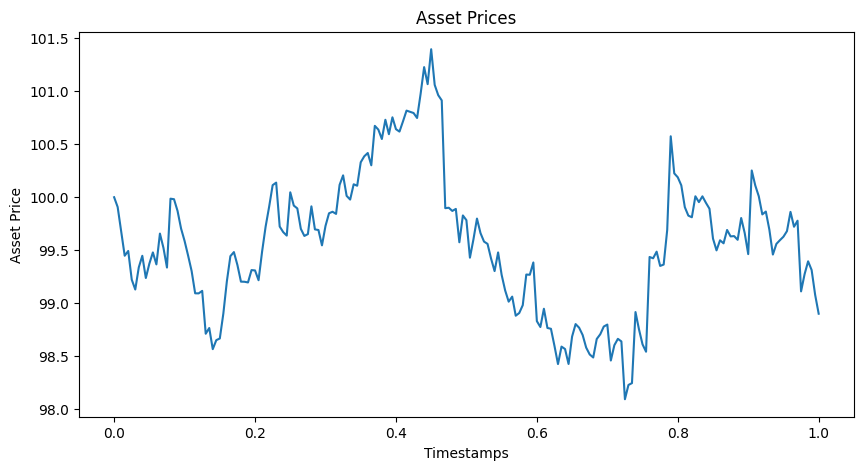

In [5]:
plot_midprice(as_env, as_agent, seed = seed)

In [6]:
# Provided data
data = """
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.01235438]]
midprice_change 
[[-0.09223896]]
midprice 
[[99.90776104]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.00030615]]
midprice_change 
[[-0.23213016]]
midprice 
[[99.67563088]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01709738]]
midprice_change 
[[-0.22734661]]
midprice 
[[99.44828427]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.03601561]]
midprice_change 
[[0.04496045]]
midprice 
[[99.49324471]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.07772908]]
midprice_change 
[[-0.27052455]]
midprice 
[[99.22272016]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.04790726]]
midprice_change 
[[-0.09305225]]
midprice 
[[99.12966791]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.129133]]
midprice_change 
[[0.20902156]]
midprice 
[[99.33868947]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.1491238]]
midprice_change 
[[0.10897923]]
midprice 
[[99.4476687]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.07041088]]
midprice_change 
[[-0.20955522]]
midprice 
[[99.23811348]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.06963824]]
midprice_change 
[[0.13530103]]
midprice 
[[99.37341451]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.06052067]]
midprice_change 
[[0.10608008]]
midprice 
[[99.47949459]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.04161448]]
midprice_change 
[[-0.11303727]]
midprice 
[[99.36645732]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.03560007]]
midprice_change 
[[0.29088334]]
midprice 
[[99.65734066]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.02588788]]
midprice_change 
[[-0.13491447]]
midprice 
[[99.5224262]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.09710697]]
midprice_change 
[[-0.18562707]]
midprice 
[[99.33679912]]
buy MO 
[1]
sell MO 
[0]
alpha 
[[105.9694282]]
midprice_change 
[[0.64964352]]
midprice 
[[99.98644264]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.50746873]]
midprice_change 
[[-0.00531109]]
midprice 
[[99.98113155]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.08657536]]
midprice_change 
[[-0.11008905]]
midprice 
[[99.8710425]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.13140812]]
midprice_change 
[[-0.1660964]]
midprice 
[[99.7049461]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.01824844]]
midprice_change 
[[-0.11739866]]
midprice 
[[99.58754744]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.00542695]]
midprice_change 
[[-0.13811584]]
midprice 
[[99.4494316]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.07137706]]
midprice_change 
[[-0.14557058]]
midprice 
[[99.30386102]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.10493697]]
midprice_change 
[[-0.20999681]]
midprice 
[[99.09386421]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.04915059]]
midprice_change 
[[-0.00074842]]
midprice 
[[99.09311579]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.08067457]]
midprice_change 
[[0.02377158]]
midprice 
[[99.11688737]]
buy MO 
[0]
sell MO 
[1]
alpha 
[[-78.3175174]]
midprice_change 
[[-0.40441781]]
midprice 
[[98.71246956]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.44807335]]
midprice_change 
[[0.05398898]]
midprice 
[[98.76645854]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.09302605]]
midprice_change 
[[-0.19926901]]
midprice 
[[98.56718953]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.0011517]]
midprice_change 
[[0.08475992]]
midprice 
[[98.65194945]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.06475615]]
midprice_change 
[[0.01604584]]
midprice 
[[98.66799529]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.01177702]]
midprice_change 
[[0.23407017]]
midprice 
[[98.90206546]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.00824765]]
midprice_change 
[[0.30434338]]
midprice 
[[99.20640884]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.00931091]]
midprice_change 
[[0.23782714]]
midprice 
[[99.44423598]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.05339775]]
midprice_change 
[[0.03838716]]
midprice 
[[99.48262313]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.18703785]]
midprice_change 
[[-0.12240779]]
midprice 
[[99.36021534]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.08817828]]
midprice_change 
[[-0.15642463]]
midprice 
[[99.20379071]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.0054163]]
midprice_change 
[[-0.00104937]]
midprice 
[[99.20274134]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.04324347]]
midprice_change 
[[-0.00636897]]
midprice 
[[99.19637237]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.05521997]]
midprice_change 
[[0.11649737]]
midprice 
[[99.31286975]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.00870139]]
midprice_change 
[[-0.00324718]]
midprice 
[[99.30962257]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.01438954]]
midprice_change 
[[-0.09237288]]
midprice 
[[99.21724969]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01522194]]
midprice_change 
[[0.2694161]]
midprice 
[[99.48666579]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.00037261]]
midprice_change 
[[0.23547324]]
midprice 
[[99.72213903]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.07090854]]
midprice_change 
[[0.18756783]]
midprice 
[[99.90970686]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.05771319]]
midprice_change 
[[0.20406348]]
midprice 
[[100.11377034]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.00808935]]
midprice_change 
[[0.02394834]]
midprice 
[[100.13771868]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.11016442]]
midprice_change 
[[-0.41431648]]
midprice 
[[99.7234022]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01547564]]
midprice_change 
[[-0.05258746]]
midprice 
[[99.67081474]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.02503477]]
midprice_change 
[[-0.03267995]]
midprice 
[[99.63813478]]
buy MO 
[1]
sell MO 
[0]
alpha 
[[50.37833251]]
midprice_change 
[[0.4083456]]
midprice 
[[100.04648039]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.20113881]]
midprice_change 
[[-0.12515998]]
midprice 
[[99.92132041]]
buy MO 
[0]
sell MO 
[1]
alpha 
[[-38.61459149]]
midprice_change 
[[-0.02700761]]
midprice 
[[99.89431279]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.08580551]]
midprice_change 
[[-0.1926093]]
midprice 
[[99.70170349]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.09459849]]
midprice_change 
[[-0.06676622]]
midprice 
[[99.63493727]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01616546]]
midprice_change 
[[0.01710867]]
midprice 
[[99.65204594]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.15594109]]
midprice_change 
[[0.26181246]]
midprice 
[[99.9138584]]
buy MO 
[0]
sell MO 
[1]
alpha 
[[-10.18800776]]
midprice_change 
[[-0.21726579]]
midprice 
[[99.6965926]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.05129702]]
midprice_change 
[[-0.00591989]]
midprice 
[[99.69067271]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.0790753]]
midprice_change 
[[-0.14462878]]
midprice 
[[99.54604393]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.04822346]]
midprice_change 
[[0.18294677]]
midprice 
[[99.7289907]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.00037768]]
midprice_change 
[[0.11979929]]
midprice 
[[99.84878999]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01174035]]
midprice_change 
[[0.01412604]]
midprice 
[[99.86291603]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.00561141]]
midprice_change 
[[-0.0200932]]
midprice 
[[99.84282283]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.00419588]]
midprice_change 
[[0.27355824]]
midprice 
[[100.11638107]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01131116]]
midprice_change 
[[0.08986159]]
midprice 
[[100.20624266]]
buy MO 
[0]
sell MO 
[1]
alpha 
[[-27.1812335]]
midprice_change 
[[-0.19352756]]
midprice 
[[100.0127151]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.07242987]]
midprice_change 
[[-0.03485972]]
midprice 
[[99.97785538]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.07934531]]
midprice_change 
[[0.14422828]]
midprice 
[[100.12208366]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.06065658]]
midprice_change 
[[-0.01373582]]
midprice 
[[100.10834783]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.06137227]]
midprice_change 
[[0.22109583]]
midprice 
[[100.32944366]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.02959422]]
midprice_change 
[[0.05628694]]
midprice 
[[100.38573061]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.07724599]]
midprice_change 
[[0.03138955]]
midprice 
[[100.41712016]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.04644838]]
midprice_change 
[[-0.11611431]]
midprice 
[[100.30100585]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.10116858]]
midprice_change 
[[0.37217617]]
midprice 
[[100.67318202]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01264841]]
midprice_change 
[[-0.03542191]]
midprice 
[[100.63776012]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.07184555]]
midprice_change 
[[-0.08869394]]
midprice 
[[100.54906618]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.02356441]]
midprice_change 
[[0.1813885]]
midprice 
[[100.73045468]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01444894]]
midprice_change 
[[-0.13599721]]
midprice 
[[100.59445747]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.10919001]]
midprice_change 
[[0.15923076]]
midprice 
[[100.75368822]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.04735453]]
midprice_change 
[[-0.11173288]]
midprice 
[[100.64195535]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.11155034]]
midprice_change 
[[-0.02315856]]
midprice 
[[100.61879678]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.04041732]]
midprice_change 
[[0.09655574]]
midprice 
[[100.71535252]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.00581817]]
midprice_change 
[[0.1014627]]
midprice 
[[100.81681523]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.01867705]]
midprice_change 
[[-0.01120619]]
midprice 
[[100.80560904]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01333762]]
midprice_change 
[[-0.01135641]]
midprice 
[[100.79425263]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.08552611]]
midprice_change 
[[-0.04693351]]
midprice 
[[100.74731912]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.02438984]]
midprice_change 
[[0.22733778]]
midprice 
[[100.9746569]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.07502802]]
midprice_change 
[[0.25219815]]
midprice 
[[101.22685505]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.07728783]]
midprice_change 
[[-0.16035626]]
midprice 
[[101.06649879]]
buy MO 
[1]
sell MO 
[0]
alpha 
[[76.9719302]]
midprice_change 
[[0.32929364]]
midprice 
[[101.39579243]]
buy MO 
[0]
sell MO 
[1]
alpha 
[[-58.64194802]]
midprice_change 
[[-0.33643869]]
midprice 
[[101.05935374]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.197666]]
midprice_change 
[[-0.0968018]]
midprice 
[[100.96255195]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.0626264]]
midprice_change 
[[-0.04925731]]
midprice 
[[100.91329464]]
buy MO 
[0]
sell MO 
[1]
alpha 
[[-203.57743877]]
midprice_change 
[[-1.01658424]]
midprice 
[[99.8967104]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[1.07876688]]
midprice_change 
[[0.00411271]]
midprice 
[[99.90082311]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.01150987]]
midprice_change 
[[-0.03011699]]
midprice 
[[99.87070611]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.10342754]]
midprice_change 
[[0.01898776]]
midprice 
[[99.88969387]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.18053864]]
midprice_change 
[[-0.31453018]]
midprice 
[[99.57516369]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.11442109]]
midprice_change 
[[0.25302516]]
midprice 
[[99.82818885]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.02383421]]
midprice_change 
[[-0.04456232]]
midprice 
[[99.78362653]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.07894636]]
midprice_change 
[[-0.35361271]]
midprice 
[[99.43001381]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.05167832]]
midprice_change 
[[0.17275483]]
midprice 
[[99.60276865]]
buy MO 
[1]
sell MO 
[0]
alpha 
[[32.03569268]]
midprice_change 
[[0.19587236]]
midprice 
[[99.79864101]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.11693656]]
midprice_change 
[[-0.13695861]]
midprice 
[[99.6616824]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.01318508]]
midprice_change 
[[-0.07997002]]
midprice 
[[99.58171238]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.04373566]]
midprice_change 
[[-0.0218735]]
midprice 
[[99.55983888]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.04398464]]
midprice_change 
[[-0.13834765]]
midprice 
[[99.42149123]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.03902976]]
midprice_change 
[[-0.11817443]]
midprice 
[[99.30331679]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.14355755]]
midprice_change 
[[0.17626742]]
midprice 
[[99.47958422]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01484672]]
midprice_change 
[[-0.21126884]]
midprice 
[[99.26831538]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.06686635]]
midprice_change 
[[-0.14724817]]
midprice 
[[99.12106721]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.02333743]]
midprice_change 
[[-0.10596423]]
midprice 
[[99.01510298]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.1735331]]
midprice_change 
[[0.04747616]]
midprice 
[[99.06257914]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.1050211]]
midprice_change 
[[-0.18002356]]
midprice 
[[98.88255558]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.10036343]]
midprice_change 
[[0.02542671]]
midprice 
[[98.90798229]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.0660925]]
midprice_change 
[[0.07401472]]
midprice 
[[98.98199701]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.04076243]]
midprice_change 
[[0.28885368]]
midprice 
[[99.27085068]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.01923808]]
midprice_change 
[[-0.00200952]]
midprice 
[[99.26884116]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.00383693]]
midprice_change 
[[0.1160143]]
midprice 
[[99.38485546]]
buy MO 
[0]
sell MO 
[1]
alpha 
[[-129.4854718]]
midprice_change 
[[-0.55345465]]
midprice 
[[98.83140081]]
buy MO 
[1]
sell MO 
[0]
alpha 
[[50.39982634]]
midprice_change 
[[-0.05548211]]
midprice 
[[98.7759187]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.27342148]]
midprice_change 
[[0.17236503]]
midprice 
[[98.94828373]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.04266395]]
midprice_change 
[[-0.1813208]]
midprice 
[[98.76696292]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.08391522]]
midprice_change 
[[-0.00776366]]
midprice 
[[98.75919926]]
buy MO 
[0]
sell MO 
[1]
alpha 
[[-35.89693784]]
midprice_change 
[[-0.16128781]]
midprice 
[[98.59791145]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.15504034]]
midprice_change 
[[-0.17140581]]
midprice 
[[98.42650564]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.03534403]]
midprice_change 
[[0.16472498]]
midprice 
[[98.59123062]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.07329234]]
midprice_change 
[[-0.02281141]]
midprice 
[[98.56841921]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.00703934]]
midprice_change 
[[-0.14117409]]
midprice 
[[98.42724513]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.16807571]]
midprice_change 
[[0.25850165]]
midprice 
[[98.68574678]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01595907]]
midprice_change 
[[0.11792492]]
midprice 
[[98.8036717]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.04218519]]
midprice_change 
[[-0.03436009]]
midprice 
[[98.76931161]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.05061698]]
midprice_change 
[[-0.06874334]]
midprice 
[[98.70056827]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.03453356]]
midprice_change 
[[-0.11883058]]
midprice 
[[98.58173769]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.06396521]]
midprice_change 
[[-0.0644596]]
midprice 
[[98.51727808]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.09250961]]
midprice_change 
[[-0.02876462]]
midprice 
[[98.48851346]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.20126916]]
midprice_change 
[[0.17466211]]
midprice 
[[98.66317557]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.05929968]]
midprice_change 
[[0.04453172]]
midprice 
[[98.7077073]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.00747009]]
midprice_change 
[[0.07271921]]
midprice 
[[98.78042651]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.10411185]]
midprice_change 
[[0.01853475]]
midprice 
[[98.79896126]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.05608002]]
midprice_change 
[[-0.33871869]]
midprice 
[[98.46024257]]
buy MO 
[1]
sell MO 
[0]
alpha 
[[20.25655562]]
midprice_change 
[[0.14414646]]
midprice 
[[98.60438903]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.12227802]]
midprice_change 
[[0.0600919]]
midprice 
[[98.66448093]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.02625265]]
midprice_change 
[[-0.0244819]]
midprice 
[[98.63999903]]
buy MO 
[0]
sell MO 
[1]
alpha 
[[-115.34813264]]
midprice_change 
[[-0.54501896]]
midprice 
[[98.09498007]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.57867409]]
midprice_change 
[[0.13450472]]
midprice 
[[98.22948479]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.1484244]]
midprice_change 
[[0.01729724]]
midprice 
[[98.24678203]]
buy MO 
[1]
sell MO 
[0]
alpha 
[[109.6628338]]
midprice_change 
[[0.67018279]]
midprice 
[[98.91696481]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.5657915]]
midprice_change 
[[-0.16453649]]
midprice 
[[98.75242832]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01183194]]
midprice_change 
[[-0.14012365]]
midprice 
[[98.61230468]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.18272303]]
midprice_change 
[[-0.069396]]
midprice 
[[98.54290868]]
buy MO 
[1]
sell MO 
[0]
alpha 
[[150.67201892]]
midprice_change 
[[0.89341741]]
midprice 
[[99.43632609]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.72656404]]
midprice_change 
[[-0.01217957]]
midprice 
[[99.42414652]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.0071912]]
midprice_change 
[[0.06254094]]
midprice 
[[99.48668747]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.02622934]]
midprice_change 
[[-0.13469806]]
midprice 
[[99.3519894]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.03533492]]
midprice_change 
[[0.01300829]]
midprice 
[[99.36499769]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.07762227]]
midprice_change 
[[0.32595708]]
midprice 
[[99.69095477]]
buy MO 
[1]
sell MO 
[0]
alpha 
[[138.83450272]]
midprice_change 
[[0.8837973]]
midprice 
[[100.57475207]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.70682958]]
midprice_change 
[[-0.34967808]]
midprice 
[[100.22507399]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.02703019]]
midprice_change 
[[-0.03702471]]
midprice 
[[100.18804928]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.04365529]]
midprice_change 
[[-0.07590659]]
midprice 
[[100.11214269]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.01122705]]
midprice_change 
[[-0.20563682]]
midprice 
[[99.90650587]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.00795304]]
midprice_change 
[[-0.07995135]]
midprice 
[[99.82655452]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.07069008]]
midprice_change 
[[-0.01566034]]
midprice 
[[99.81089418]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.02630144]]
midprice_change 
[[0.19797435]]
midprice 
[[100.00886853]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.11114695]]
midprice_change 
[[-0.05508809]]
midprice 
[[99.95378044]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01025628]]
midprice_change 
[[0.05468769]]
midprice 
[[100.00846813]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.14846645]]
midprice_change 
[[-0.06166744]]
midprice 
[[99.94680068]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.01377715]]
midprice_change 
[[-0.05531534]]
midprice 
[[99.89148535]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01080437]]
midprice_change 
[[-0.28133753]]
midprice 
[[99.61014782]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.12496268]]
midprice_change 
[[-0.11135252]]
midprice 
[[99.4987953]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.00970959]]
midprice_change 
[[0.09506766]]
midprice 
[[99.59386296]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.03143732]]
midprice_change 
[[-0.02854471]]
midprice 
[[99.56531825]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.06814702]]
midprice_change 
[[0.12591037]]
midprice 
[[99.69122862]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.06734459]]
midprice_change 
[[-0.0605957]]
midprice 
[[99.63063292]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.21143406]]
midprice_change 
[[0.00276805]]
midprice 
[[99.63340097]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.03651306]]
midprice_change 
[[-0.0350853]]
midprice 
[[99.59831567]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.07340654]]
midprice_change 
[[0.20572508]]
midprice 
[[99.80404075]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.0071377]]
midprice_change 
[[-0.14157613]]
midprice 
[[99.66246463]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.04196503]]
midprice_change 
[[-0.19896362]]
midprice 
[[99.46350101]]
buy MO 
[1]
sell MO 
[0]
alpha 
[[126.88045818]]
midprice_change 
[[0.78865824]]
midprice 
[[100.25215925]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.63595256]]
midprice_change 
[[-0.14098626]]
midprice 
[[100.11117299]]
buy MO 
[0]
sell MO 
[1]
alpha 
[[-17.13870823]]
midprice_change 
[[-0.10242651]]
midprice 
[[100.00874648]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.17898841]]
midprice_change 
[[-0.17071714]]
midprice 
[[99.83802934]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.11420589]]
midprice_change 
[[0.02672706]]
midprice 
[[99.8647564]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.09353968]]
midprice_change 
[[-0.17052802]]
midprice 
[[99.69422838]]
buy MO 
[0]
sell MO 
[1]
alpha 
[[-72.90601146]]
midprice_change 
[[-0.23482166]]
midprice 
[[99.45940672]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.31820834]]
midprice_change 
[[0.1004782]]
midprice 
[[99.55988491]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.05619391]]
midprice_change 
[[0.03483882]]
midprice 
[[99.59472373]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.00150807]]
midprice_change 
[[0.03294301]]
midprice 
[[99.62766674]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.0709125]]
midprice_change 
[[0.05279408]]
midprice 
[[99.68046083]]
buy MO 
[1]
sell MO 
[0]
alpha 
[[13.36293148]]
midprice_change 
[[0.18139928]]
midprice 
[[99.8618601]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.02429127]]
midprice_change 
[[-0.14031453]]
midprice 
[[99.72154558]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.03477987]]
midprice_change 
[[0.05701142]]
midprice 
[[99.778557]]
buy MO 
[0]
sell MO 
[1]
alpha 
[[-143.25063358]]
midprice_change 
[[-0.66656547]]
midprice 
[[99.11199152]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.62524295]]
midprice_change 
[[0.16193488]]
midprice 
[[99.2739264]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.029938]]
midprice_change 
[[0.12167046]]
midprice 
[[99.39559687]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.01960623]]
midprice_change 
[[-0.08210036]]
midprice 
[[99.31349651]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[-0.03019853]]
midprice_change 
[[-0.23430766]]
midprice 
[[99.07918885]]
buy MO 
[0]
sell MO 
[0]
alpha 
[[0.03279464]]
midprice_change 
[[-0.17785493]]
midprice 
[[98.90133392]]
"""

# Split the data into lines
lines = data.strip().split("\n")

# Create empty lists to store the data
buy_MO = []
sell_MO = []
alpha = []
midprice_change = []
midprice = []

# Parsing the data
for i in range(0, len(lines), 2):
    label = lines[i]
    value_line = lines[i + 1]
    
    # Parse the value out of the format [[value]]
    value = value_line.strip("[]")
    
    if "buy MO" in label:
        buy_MO.append(True if "1" in value else False)
    elif "sell MO" in label:
        sell_MO.append(True if "1" in value else False)
    elif "alpha" in label:
        alpha.append(float(value))
    elif "midprice_change" in label:
        midprice_change.append(float(value))
    elif "midprice" in label:
        midprice.append(float(value))

buy_MO.insert(0, False)
sell_MO.insert(0, False)
alpha.insert(0, 0)
midprice_change.insert(0, 0)
midprice.insert(0, 100)

# Print the results
print(len(buy_MO))
print(len(sell_MO))
print(len(alpha))
print(len(midprice_change))
print(len(midprice))

201
201
201
201
201


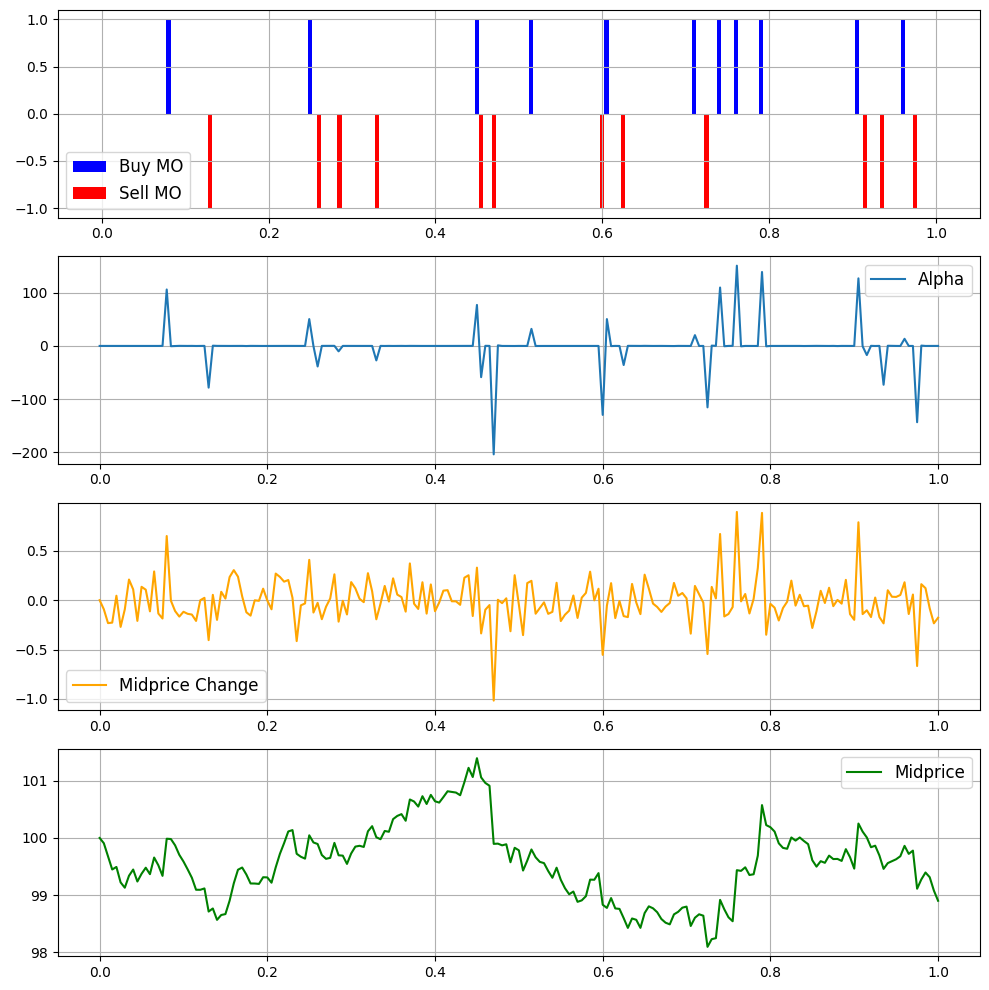

In [7]:
timestamps = np.linspace(0, 1, len(alpha))

plt.figure(figsize=(10, 10))

# Buy and Sell MOs
plt.subplot(4, 1, 1)
buy_heights = [1 if buy_MO[i] else 0 for i in range(len(buy_MO))]
sell_heights = [-1 if sell_MO[i] else 0 for i in range(len(sell_MO))]
plt.bar(timestamps, buy_heights, label='Buy MO', color='blue', width=0.005)
plt.bar(timestamps, sell_heights, label='Sell MO', color='red', width=0.005)
plt.legend(fontsize='large')  
plt.grid(True)

# Alpha
plt.subplot(4, 1, 2)
plt.plot(timestamps, alpha, label='Alpha')
plt.legend(fontsize='large') 
plt.grid(True)

# Midprice Change
plt.subplot(4, 1, 3)
plt.plot(timestamps, midprice_change, label='Midprice Change', color='orange')
plt.legend(fontsize='large')  
plt.grid(True)

# Midprice
plt.subplot(4, 1, 4)
plt.plot(timestamps, midprice, label='Midprice', color='green')
plt.legend(fontsize='large')  
plt.grid(True)

plt.tight_layout()
plt.savefig('midpriceplot.png', dpi=300)
plt.show()